<a href="https://colab.research.google.com/github/imabari/covid19-data/blob/master/ehime/ehime_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# インストール

In [1]:
!pip install pycurl
!pip install retry

     |████████████████████████████████| 225kB 4.8MB/s 
  Created wheel for pycurl: filename=pycurl-7.43.0.5-cp36-cp36m-linux_x86_64.whl size=283526 sha256=7b2b28e75b2503e2c73795587d32c11b1af8f8ac27d055ccce134cf011ee830a
  Stored in directory: /root/.cache/pip/wheels/98/a3/19/9439c79b88a742f508af0c4e410ae3f685db2e13d3374e798e
Successfully built pycurl


In [2]:
!pip install -U pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


# 設定

In [0]:
USER_AGENT = "Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko"

DOWNLOAD_DIR = "download"
DATA_DIR = "data"

# オープンデータ

In [0]:
kanja_csv = "https://www.pref.ehime.jp/opendata-catalog/dataset/2174/resource/7057/380008_ehime_covid19_patients.csv"
kensa_csv = "https://www.pref.ehime.jp/opendata-catalog/dataset/2174/resource/7056/380008_ehime_covid19_test_people.csv"

# データラングリング

In [0]:
import pycurl
from retry import retry
import pathlib

In [0]:
@retry(tries=5, delay=5, backoff=3)
def get_file(url, file_name, dir="."):

    p = pathlib.Path(dir, file_name)

    p.parent.mkdir(parents=True, exist_ok=True)

    with p.open(mode="wb") as f:

        c = pycurl.Curl()
        c.setopt(c.URL, url)
        c.setopt(c.USERAGENT, USER_AGENT)
        c.setopt(c.WRITEDATA, f)
        c.perform()
        c.close()

    return p

In [0]:
import pandas as pd

In [0]:
import datetime
import pathlib
import json

In [0]:
JST = datetime.timezone(datetime.timedelta(hours=+9), "JST")

In [0]:
dt_now = datetime.datetime.now(JST)
dt_update = dt_now.strftime("%Y/%m/%d %H:%M")

In [0]:
data = {"lastUpdate": dt_update}

# 検査

In [0]:
kensa_path = get_file(kensa_csv, "kensa.csv", DOWNLOAD_DIR)
df_inspections_sum = pd.read_csv(kensa_path, index_col="実施_年月日", parse_dates=True).loc[:, "検査実施_人数"]

df_inspections_sum.name = "検査人数"

# 患者

In [0]:
kanja_path = get_file(kanja_csv, "kanja.csv", DOWNLOAD_DIR)
df_kanja = pd.read_csv(kanja_path, index_col="No", parse_dates=["公表_年月日", "発症_年月日"])

In [0]:
df_kanja.columns = df_kanja.columns.map(lambda s: s.replace("患者_", ""))

In [0]:
weeks = ["月", "火", "水", "木", "金", "土", "日"]
df_kanja["曜日"] = df_kanja["公表_年月日"].dt.dayofweek.apply(lambda x: weeks[x])

In [0]:
df_kanja["退院"] = df_kanja["退院済フラグ"].replace({1: "○", 0: ""}).fillna("")

In [0]:
patients = df_kanja.loc[:, [ "公表_年月日", "曜日", "居住地", "年代", "性別", "退院"]]

In [18]:
patients

,公表_年月日,曜日,居住地,年代,性別,退院
No,,,,,,
1,2020-03-02,月,愛南町,40代,女性,
2,2020-03-04,水,松山市,30代,女性,
3,2020-03-18,水,松山市,30代,女性,
4,2020-03-26,木,新居浜市,20代,男性,
5,2020-03-30,月,松山市,70代,男性,
6,2020-03-30,月,松山市,80代,男性,
7,2020-03-30,月,松山市,80代,女性,
8,2020-03-30,月,松山市,50代,男性,
9,2020-03-30,月,松山市,60代,男性,


In [0]:
df_patients_sum = (
    df_kanja["公表_年月日"].value_counts().sort_index().asfreq("D", fill_value=0)
)

df_patients_sum.name = "陽性人数"

In [0]:
df_kensa = pd.concat([df_inspections_sum, df_patients_sum], axis=1).fillna(0).astype("Int64")

In [21]:
df_kensa

,検査人数,陽性人数
2020-02-01,0,0
2020-02-02,0,0
2020-02-03,1,0
2020-02-04,0,0
2020-02-05,0,0
...,...,...
2020-04-23,16,0
2020-04-24,25,0
2020-04-25,21,0
2020-04-26,1,0


# 可視化

In [22]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 4.9MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=90bc1e8751bbf1b8bb39c08cd35c243cba921f80dd7ca12f96edfd49096581d9
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [0]:
import matplotlib.pyplot as plt

In [24]:
import japanize_matplotlib
import matplotlib.dates as mdates

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [0]:
# 解像度
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

## 検査件数

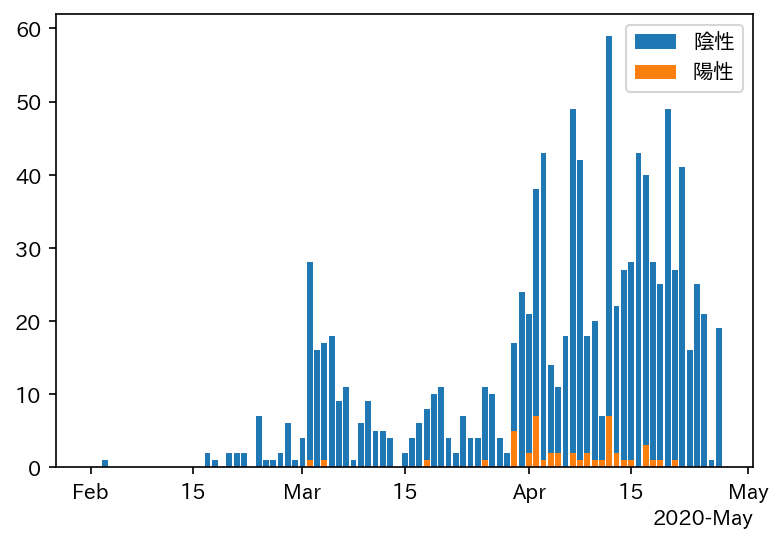

In [26]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.bar(df_kensa.index, df_kensa["検査人数"])
ax.bar(df_kensa.index, df_kensa["陽性人数"])
ax.legend(["陰性", "陽性"])

# グラフを保存
plt.savefig('01_kensa.png', dpi=200, bbox_inches="tight")
plt.show()

## 陽性患者

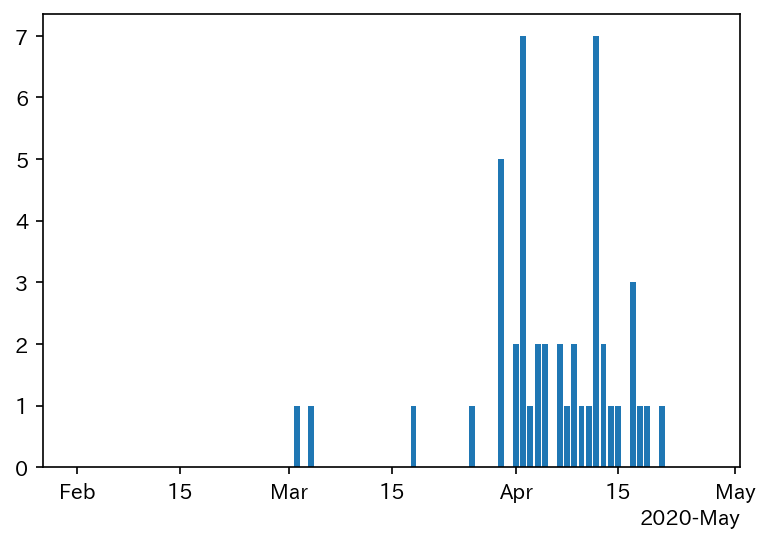

In [27]:
fig, ax = plt.subplots()

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.bar(df_kensa.index, df_kensa["陽性人数"])

# グラフを保存
plt.savefig('02_yousei.png', dpi=200, bbox_inches="tight")
plt.show()

In [28]:
patients

,公表_年月日,曜日,居住地,年代,性別,退院
No,,,,,,
1,2020-03-02,月,愛南町,40代,女性,
2,2020-03-04,水,松山市,30代,女性,
3,2020-03-18,水,松山市,30代,女性,
4,2020-03-26,木,新居浜市,20代,男性,
5,2020-03-30,月,松山市,70代,男性,
6,2020-03-30,月,松山市,80代,男性,
7,2020-03-30,月,松山市,80代,女性,
8,2020-03-30,月,松山市,50代,男性,
9,2020-03-30,月,松山市,60代,男性,


## 居住地別

In [29]:
df_area = pd.crosstab(df_kanja["公表_年月日"], df_kanja["居住地"])
df_area

居住地,内子町,愛南町,新居浜市,松前町,松山市,砥部町,西予市
公表_年月日,,,,,,,
2020-03-02,0,1,0,0,0,0,0
2020-03-04,0,0,0,0,1,0,0
2020-03-18,0,0,0,0,1,0,0
2020-03-26,0,0,1,0,0,0,0
2020-03-30,0,0,0,0,5,0,0
2020-04-01,0,0,0,2,0,0,0
2020-04-02,0,0,1,1,4,1,0
2020-04-03,0,0,1,0,0,0,0
2020-04-04,0,1,0,1,0,0,0


## 居住地別（全期間）

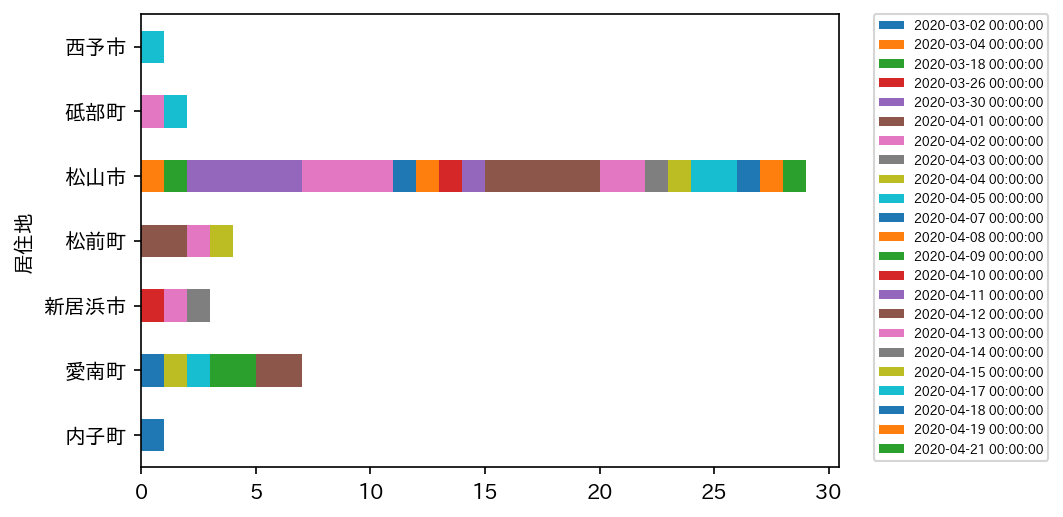

In [30]:
df_area.T.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=6)

# グラフを保存
plt.savefig('03_area.png', dpi=200, bbox_inches="tight")
plt.show()

## 居住地別（直近７日）

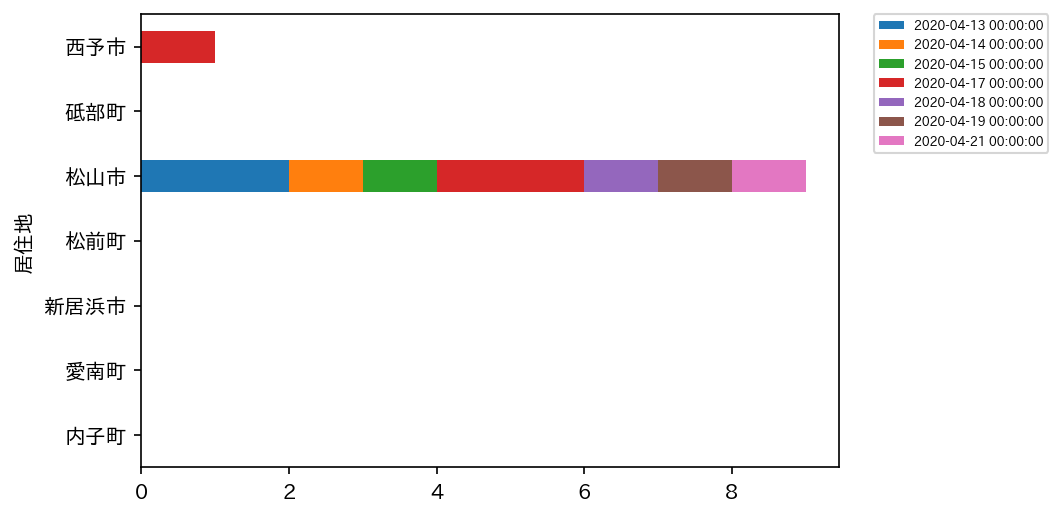

In [31]:
df_area.tail(7).T.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=6)

# グラフを保存
plt.savefig('04_area_7day.png', dpi=200, bbox_inches="tight")
plt.show()

## 年代別

In [0]:
age_list = ["10歳未満","10代", "20代", "30代", "40代", "50代", "60代", "70代", "80代", "90歳以上", "非公表"]

In [0]:
df_age = pd.crosstab(patients["年代"], patients["性別"]).reindex(index= age_list, columns = ["男性", "女性"], fill_value=0)

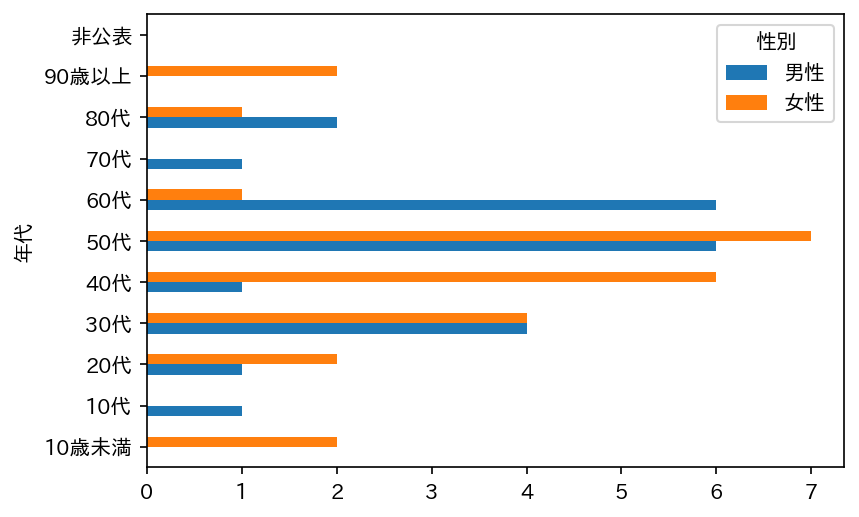

In [34]:
df_age.plot.barh()

# グラフを保存
plt.savefig('05_age.png', dpi=200, bbox_inches="tight")
plt.show()

## 性別

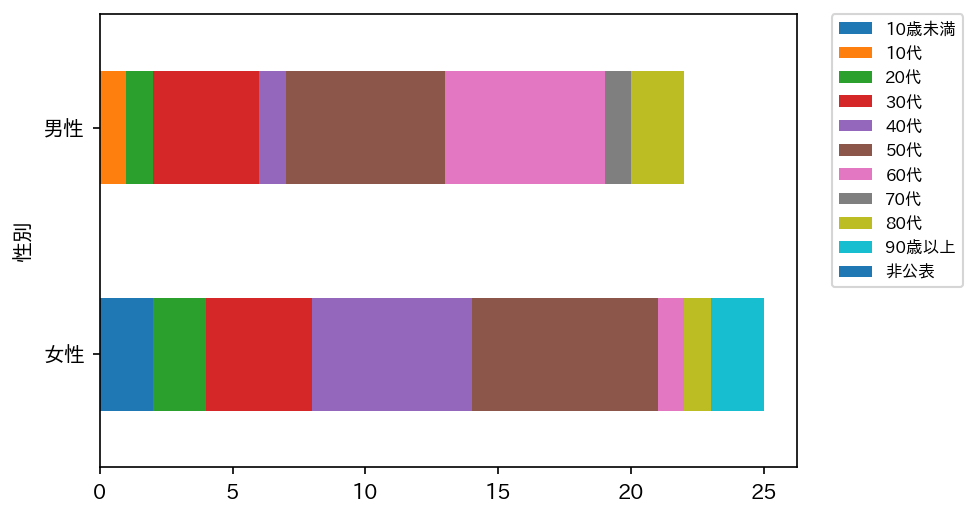

In [35]:
df_gender = pd.crosstab(patients["性別"], patients["年代"]).reindex(columns=age_list, fill_value=0)
df_gender.plot.barh(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)

# グラフを保存
plt.savefig('06_gender.png', dpi=200, bbox_inches="tight")
plt.show()

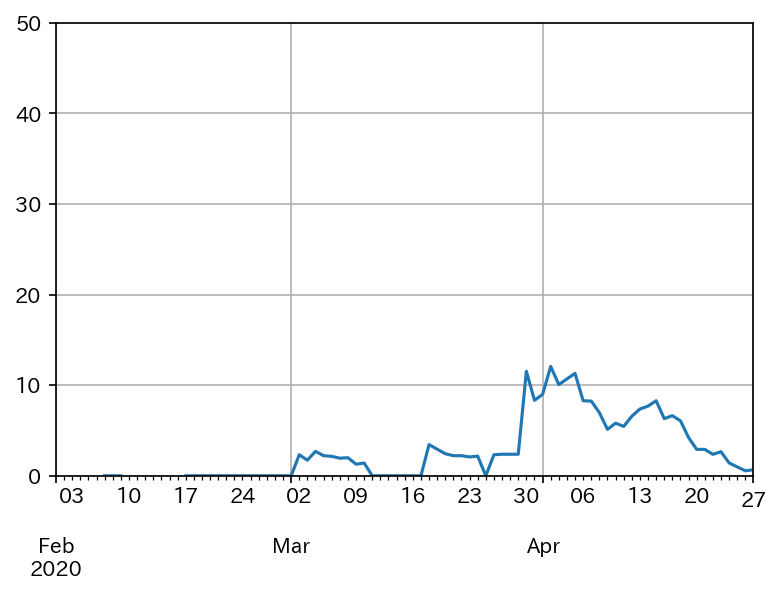

In [36]:
# 7日間平均
df_positive_7d = df_kensa.rolling(window=7).mean()
df_positive_7d["陽性率"] = df_positive_7d["陽性人数"] / df_positive_7d["検査人数"] * 100
df_positive_7d["陽性率"].plot(ylim=(0, 50), grid=True)

# グラフを保存
plt.savefig("07_positive.png", dpi=200, bbox_inches="tight")
plt.show()